In [40]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(2768, 10)

In [5]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [7]:
df.duplicated().sum()

0

In [27]:
df = df.rename(columns={"DiabetesPedigreeFunction": "FamilyHistory"})
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'FamilyHistory', 'Age', 'Outcome'],
      dtype='object')

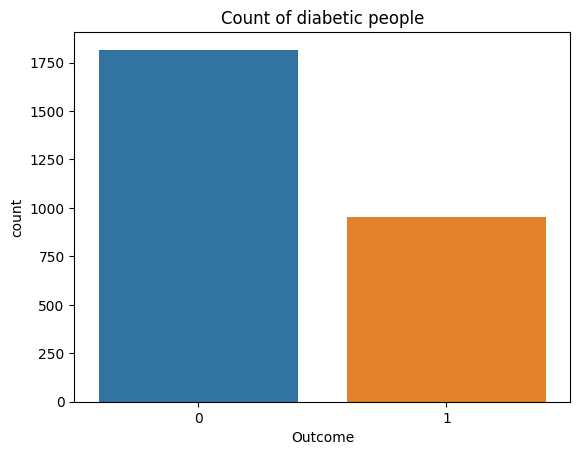

In [31]:
sns.countplot(x="Outcome", data=df)
plt.title("Count of diabetic people")
plt.show()

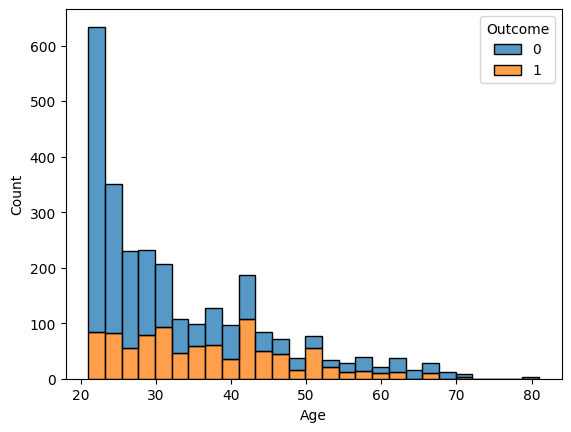

In [41]:
# Age distribution across outcome
sns.histplot(data=df, x="Age", hue="Outcome", multiple="stack")
plt.show()

<Axes: xlabel='Outcome', ylabel='Glucose'>

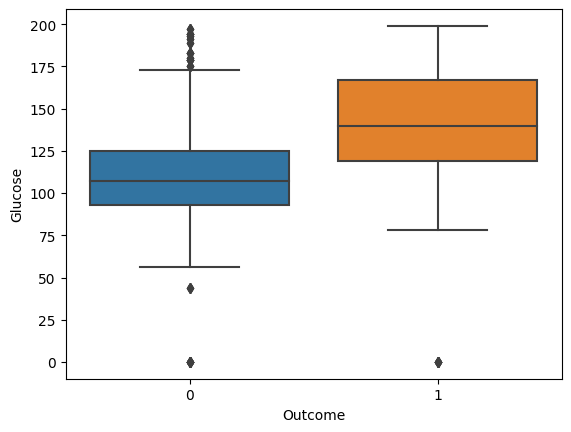

In [35]:
# Glucose vs Outcome
sns.boxplot(x="Outcome", y="Glucose", data=df)

<Axes: xlabel='Outcome', ylabel='BMI'>

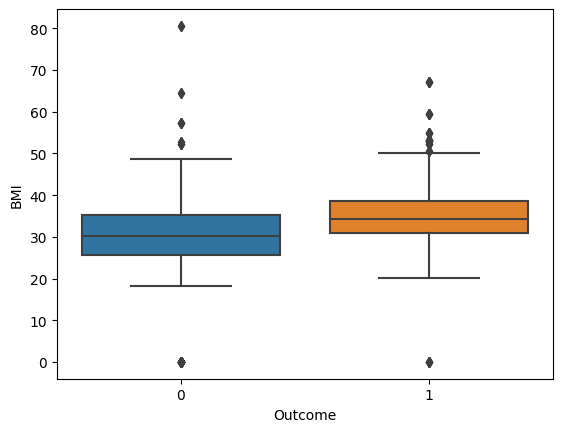

In [36]:
# BMI vs Outcome
sns.boxplot(x="Outcome", y="BMI", data=df)

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

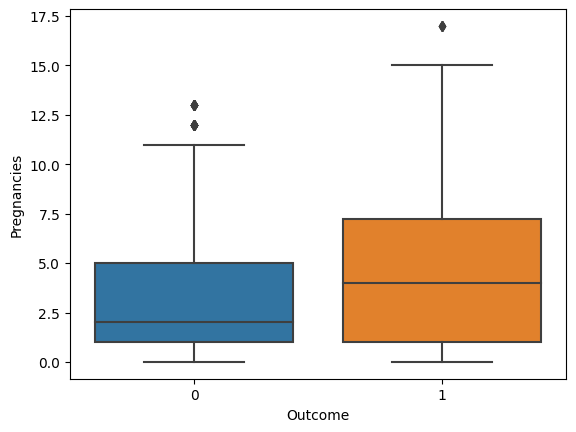

In [44]:
# Pregnancies vs Outcome
sns.boxplot(x="Outcome", y="Pregnancies", data=df)

In [45]:
# Pregnancies and Age vs outcome
df.groupby('Outcome')[['Pregnancies','Age']].mean()

,Pregnancies,Age
Outcome,,
0,3.204295,31.111233
1,4.769958,36.987395


<Axes: xlabel='Outcome', ylabel='SkinThickness'>

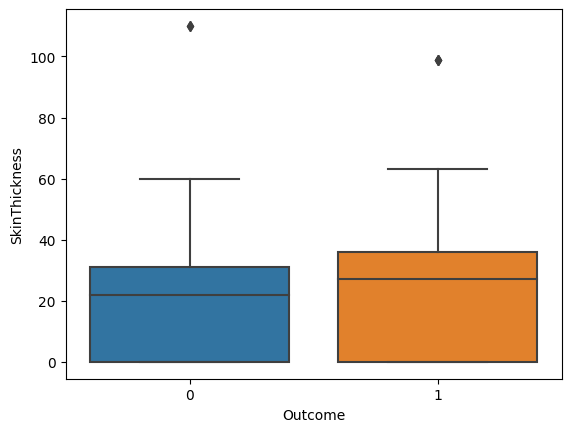

In [47]:
# Pregnancies vs Outcome
sns.boxplot(x="Outcome", y="SkinThickness", data=df)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

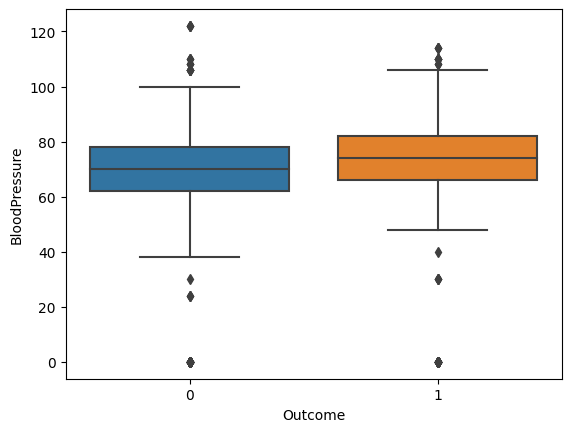

In [48]:
# Pregnancies vs Outcome
sns.boxplot(x="Outcome", y="BloodPressure", data=df)

In [ ]:
# Pregnancies vs Outcome
sns.boxplot(x="Outcome", y="FamilyHistory", data=df)

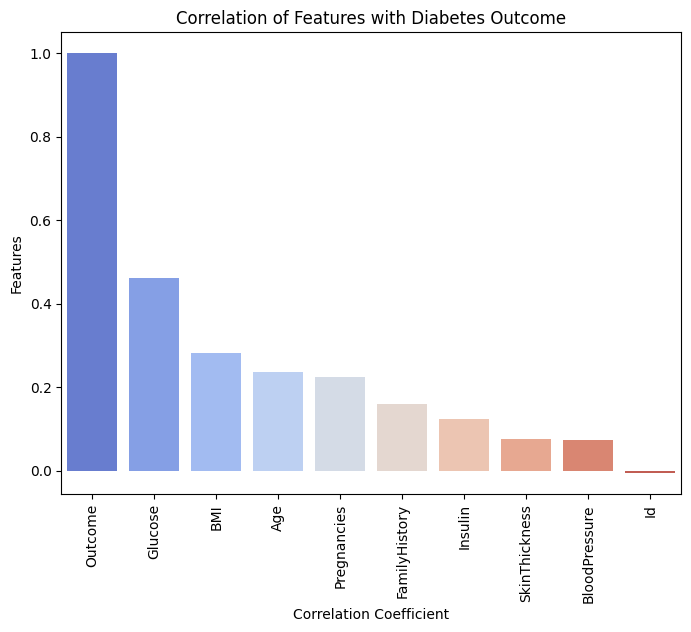

In [37]:
corr = df.corr()['Outcome'].sort_values(ascending=False)

plt.figure(figsize=(8,6)) 
sns.barplot(x=corr.index, y=corr.values, palette="coolwarm")
plt.title("Correlation of Features with Diabetes Outcome") 
plt.xlabel("Correlation Coefficient") 
plt.ylabel("Features")
plt.xticks(rotation = 90)
plt.show()

In [43]:
df.groupby('Outcome')[['Glucose','Age','BMI','BloodPressure']].mean()

,Glucose,Age,BMI,BloodPressure
Outcome,,,,
0,110.419604,31.111233,30.494989,68.119493
1,141.481092,36.987395,35.270378,71.070378


**Insights**
1. Glucose: strongest predictor, diabetics have much higher glucose.
2. BMI: overweight patients more likely to be diabetic.
3. Age: older patients more often diabetic, but effect is weaker than glucose & BMI
4. Both age and pregnancy count are higher among diabetic patients, suggesting that older age and multiple pregnancies are contributing factors to diabetes risk.
5. FamilyHistory (DiabetesPedigreeFunction): Genetic/family risk increases diabetes chance.
6. Insulin: Higher in diabetics, but noisy due to many missing/zero values.
7. SkinThickness & BloodPressure: Weak predictors, small difference across outcomes but slighly higher in diabetic patients.